In [103]:
import GenBioX.data_preprocessing as dp
import GenBioX.statistical_analysis as sa
import GenBioX.alignment as a
import GenBioX.annotation as an
import GenBioX.variant_analysis as va
import GenBioX.gene_expression as ge
import GenBioX.comparative_genomics as ca

In [3]:
# reading a fasta file

seq = dp.read_fasta('seq.fasta')
seq

['TTTTTTTTTTTAGTAGACACAGGGTTTCACCATGCCGGCCAGGCTGGTCTCAAACTCCTGACCTCAGGTGATCCGCCAATCTCAGCCCCCCAAAATGCTGAAATTACAGACATGAGCCACACGCACCCGGCCTATGCATCCTCTTTTCTAATTGTCCTATAATAAATATTCTATCCTCTCTCTGAGATGACCTTATAGAAACAGCAATGGTTTGGAGAATCTGTAGTCCTGGGTTCAGATTCCACTTCTGCCACTTGTCTAGTTATGGGACTCCTGTAGACCTCTGTTGCTCTTATGTAAGATAGTTTCTATGTCATGAAAGTGAAAATGGGATCAGGTATGTAAAGTACCTAGCAG']

In [4]:
# fasta Quality Check

qc = dp.fasta_quality_check(seq)
print(qc)


{'Sequence_1': {'length': 357, 'nucleotide_counts': {'A': 91, 'C': 86, 'G': 70, 'T': 110}, 'GC_content': 0.4369747899159664, 'status': 'Passes quality check'}}


In [5]:
# fasta Quality Score

qs = dp.quality_score(seq)
print(qs)

[0]


In [6]:
# Trim Adapters

ts = dp.trim_adapters(seq, adapter='AAGA')
print(ts)

['TTTTTTTTTTTAGTAGACACAGGGTTTCACCATGCCGGCCAGGCTGGTCTCAAACTCCTGACCTCAGGTGATCCGCCAATCTCAGCCCCCCAAAATGCTGAAATTACAGACATGAGCCACACGCACCCGGCCTATGCATCCTCTTTTCTAATTGTCCTATAATAAATATTCTATCCTCTCTCTGAGATGACCTTATAGAAACAGCAATGGTTTGGAGAATCTGTAGTCCTGGGTTCAGATTCCACTTCTGCCACTTGTCTAGTTATGGGACTCCTGTAGACCTCTGTTGCTCTTATGT']


In [7]:
# Remove Duplicates 

data = dp.remove_duplicates(seq)
print(data)

Removed 0 duplicate sequences.
['TTTTTTTTTTTAGTAGACACAGGGTTTCACCATGCCGGCCAGGCTGGTCTCAAACTCCTGACCTCAGGTGATCCGCCAATCTCAGCCCCCCAAAATGCTGAAATTACAGACATGAGCCACACGCACCCGGCCTATGCATCCTCTTTTCTAATTGTCCTATAATAAATATTCTATCCTCTCTCTGAGATGACCTTATAGAAACAGCAATGGTTTGGAGAATCTGTAGTCCTGGGTTCAGATTCCACTTCTGCCACTTGTCTAGTTATGGGACTCCTGTAGACCTCTGTTGCTCTTATGTAAGATAGTTTCTATGTCATGAAAGTGAAAATGGGATCAGGTATGTAAAGTACCTAGCAG']


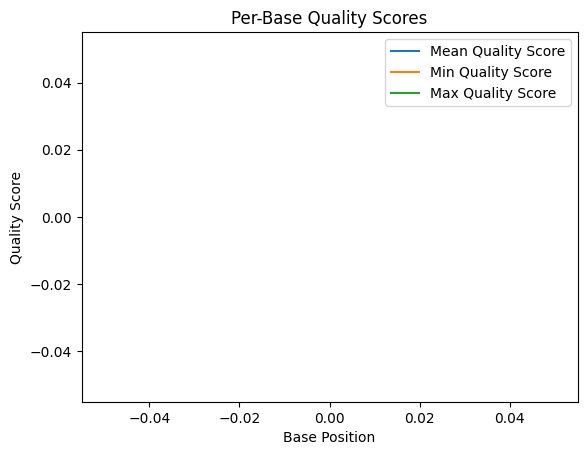

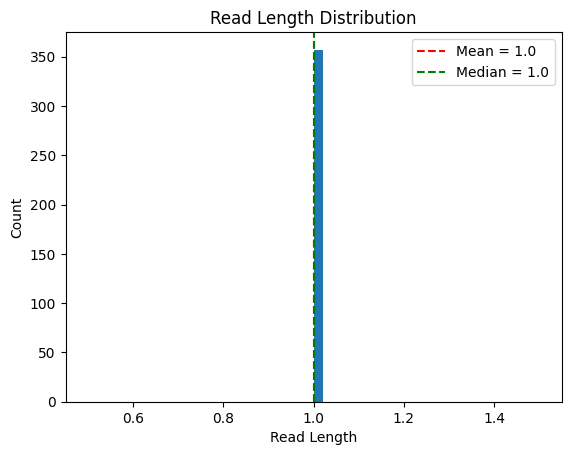

Number of reads: 357
Mean read length: 1.0
Median read length: 1.0


In [141]:
data = dp.visualise_quality_metrics(dna_sequence, qs)

# Module 2 -- Statistical Analysis

In [8]:
# Translate Nucleotide into Protein

t = sa.translate(seq)
t

['FFFLVDTGFHHAGQAGLKLLTSGDPPISAPQNAEITDMSHTHPAYASSFLIVL**IFYPLSEMTL*KQQWFGESVVLGSDSTSATCLVMGLL*TSVALM*DSFYVMKVKMGSGM*ST*Q']

In [9]:
# reverse complement of a sequence 

r = sa.reverse_complement('TTTTTTTTTTTAGTAGACACAGGGTTTCACCATGCCGGCCAGGCTGGTCTCAAACTCCTGACCTCAGGTGATCCGCCAATCTCAGCCCCCCAAAATGCTGAAATTACAGACATGAGCCACACGCACCCGGCCTATGCATCCTCTTTTCTAATTGTCCTATAATAAATATTCTATCCTCTCTCTGAGATGACCTTATAGAAACAGCAATGGTTTGGAGAATCTGTAGTCCTGGGTTCAGATTCCACTTCTGCCACTTGTCTAGTTATGGGACTCCTGTAGACCTCTGTTGCTCTTATGTAAGATAGTTTCTATGTCATGAAAGTGAAAATGGGATCAGGTATGTAAAGTACCTAGCAG')
r

'CTGCTAGGTACTTTACATACCTGATCCCATTTTCACTTTCATGACATAGAAACTATCTTACATAAGAGCAACAGAGGTCTACAGGAGTCCCATAACTAGACAAGTGGCAGAAGTGGAATCTGAACCCAGGACTACAGATTCTCCAAACCATTGCTGTTTCTATAAGGTCATCTCAGAGAGAGGATAGAATATTTATTATAGGACAATTAGAAAAGAGGATGCATAGGCCGGGTGCGTGTGGCTCATGTCTGTAATTTCAGCATTTTGGGGGGCTGAGATTGGCGGATCACCTGAGGTCAGGAGTTTGAGACCAGCCTGGCCGGCATGGTGAAACCCTGTGTCTACTAAAAAAAAAAA'

In [10]:
# Nucleotide Count

dna_sequence = "TTTTTTTTTTTAGTAGACACAGGGTTTCACCATGCCGGCCAGGCTGGTCTCAAACTCCTGACCTCAGGTGATCCGCCAATCTCAGCCCCCCAAAATGCTGAAATTACAGACATGAGCCACACGCACCCGGCCTATGCATCCTCTTTTCTAATTGTCCTATAATAAATATTCTATCCTCTCTCTGAGATGACCTTATAGAAACAGCAATGGTTTGGAGAATCTGTAGTCCTGGGTTCAGATTCCACTTCTGCCACTTGTCTAGTTATGGGACTCCTGTAGACCTCTGTTGCTCTTATGTAAGATAGTTTCTATGTCATGAAAGTGAAAATGGGATCAGGTATGTAAAGTACCTAGCAG"
count = sa.count_nucleotides(dna_sequence)
print(count)

{'A': 91, 'C': 86, 'G': 70, 'T': 110}


In [11]:
# GC Content of a sequence 

gc = sa.calculate_gc_content(dna_sequence)
print(gc)

43.69747899159664


# Module 3 -- Alignment

In [12]:
# alignment 
# also can add a ref genome like this aligned_seq = align(nucleotide_list, ref_genome='AGCTGATCGTGACTGCATGCA...')


a1 = a.align(dna_sequence)
print(a1)

Alignment(seqA='-----------A-T---C---G...-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------', seqB='TTTTTTTTTTTAGTAGACACAG---GGTTTCACCATGCCGGCCAGGCTGGTCTCAAACTCCTGACCTCAGGTGATCCGCCAATCTCAGCCCCCCAAAATGCTGAAATTACAGACATGAGCCACACGCACCCGGCCTATGCATCCTCTTTTCTAATTGTCCTATAATAAATATTCTATCCTCTCTCTGAGATGACCTTATAGAAACAGCAATGGTTTGGAGAATCTGTAGTCCTGGGTTCAGATTCCACTTCTGCCACTTGTCTAGTTATGGGACTCCTGTAGACCTCTGTTGCTCTTATGTAAGATAGTTTCTATGTCATGAAAGTGAAAATGGGATCAGGTATGTAAAGTACCTAGCAG', score=4.0, start=0, end=360)


In [13]:
# pairwise alignment 
# To use the function, simply call it with the filenames of your two FASTA sequence files:

pal = a.pairwise_alignment("seq.fasta", "seq2.fasta")

TTTTTTTTTTTAGTAGACAC-AGGGTTTC-AC-CATGCCGGCCAGGCTGGTCTCAA-AC-TCC--T-GACCTCAGGTGATC-C-G---C--CAATCTCAGCCCCCCAAAATGCTGAAATTACA-GA-CATGAGCCACACGCACCCG-GCCTATGCATCCTCTTTTCTAATTGTCCTATAATAAATATTCTATCCTCTCTCTGA-GATGACCTTATAGAAACAGCAATGGTTTGGAGAATCTGTAGTCCTGGGTTCAGATTCCACTTCT-GCCACTTGTCTAGTTATGGGACTCCTGTAGACCTCTGTTGCTCTTATGTAAGATAGTTTCTATGTCATGAAAGTGAAAATGGGATCAGGTATGTAAAGTACCTAGCAG
|||||||||||..|....|| ||....|| || ||.| .|||.....|..|..||. |. |..  | ||....||||.||. | |   |  |||||||||...|.|..|..|||.|.||.|.. || |||....|.|....|.... ||.|.||.|.||.|.|.|.|..|.||.|.|.|.|....|.|..||..|.|.||||. ||..|..|||.| |||||..||....||..||.....|||..||| ..|| ..|||...|||.| |..|..|.| | | |.|..|..|||.|| |   |.|..|| ||..||..||.|.| ..| | || .| .|.||| |||..|.|||  ..|||.|..||....||..|.
TTTTTTTTTTTTTTTTTAACCAGCCACTCTACTCAAG-GGGCATATATTTTGGCATGAGGTGGGATAGAGGATAGGTCATTGCTGTAACTTCAATCTCAGTTACTCTCAGGGCTCACATGATGTGAACATTTTGCTCTGTGATTGTAGCATTTGAAGCCACGTATTTTTTGGTGCCACATTGCCAAGTAAATGTTTTATCTGTTGAACAAGTTAGA-AAACATTAAACTCTTTAAGCTGGAGTA

TTT-TTTTTTTTAGTAGACACAGGGTTTC-AC-CATGCCGGCC-AGGC-TGGTCTCAAACTCC--T-GACCTCAGGTGATC-C-G---C--CAATCTCAGCCCCCCAAAATGCTGAAATTACA-GA-CATGAGCCACACGCACCCG-GCCTATGCATCCTCTTTTCTAATTGTCCTATAATAAATATTCTATCCTCTCTCTGA-GATGACCTTATAGAAACAGCAATGGTTTGGAGAATCTGTAGTCCTGGGTTCAGATTCCACTTCT-GCCACTTGTCTAGTTATGGGACTCCTGTAGACCTCTGTTGCTCTTATGTAAGATAGTTTCTATGTCATGAAAGTGAAAATGGGATCAGGTATGTAAAGTACCTAGCAG
||| ||||||||..|..|..|||....|| || ||.|. |||. |... |.|.|...|..|..  | ||....||||.||. | |   |  |||||||||...|.|..|..|||.|.||.|.. || |||....|.|....|.... ||.|.||.|.||.|.|.|.|..|.||.|.|.|.|....|.|..||..|.|.||||. ||..|..|||.| |||||..||....||..||.....|||..||| ..|| ..|||...|||.| |..|..|.| | | |.|..|..|||.|| |   |.|..|| ||..||..||.|.| ..| | || .| .|.||| |||..|.|||  ..|||.|..||....||..|.
TTTTTTTTTTTTTTTTTAACCAGCCACTCTACTCAAGG-GGCATATATTTTGGCATGAGGTGGGATAGAGGATAGGTCATTGCTGTAACTTCAATCTCAGTTACTCTCAGGGCTCACATGATGTGAACATTTTGCTCTGTGATTGTAGCATTTGAAGCCACGTATTTTTTGGTGCCACATTGCCAAGTAAATGTTTTATCTGTTGAACAAGTTAGA-AAACATTAAACTCTTTAAGCTGGAGTA

TTTTTT-TTTTTAGTAGACACAGGGTTTC-AC-CATGCCGGCCAGGCTGGTCTCAA-A-CTC-C-T-GACCTCAGGTGATC-C-G---C--CAATCTCAGCCCCCCAAAATGCTGAAATTACA-GA-CATGAGCCACACGCACCCG-GCCTATGCATCCTCTTTTCTAATTGTCCTATAATAAATATTCTATCCTCTCTCTGA-GATGACCTTATAGAAACAGCAATGGTTTGGAGAATCTGTAGTCCTGGGTTCAGATTCCACTTCT-GCCACTTGTCTAGTTATGGGACTCCTGTAGACCTCTGTTGCTCTTATGTAAGATAGTTTCTATGTCATGAAAGTGAAAATGGGATCAGGTATGTAAAGTACCTAGCAG
|||||| |||||..|..|..|||....|| || ||.|. |||.....|..|..||. | .|. . | ||....||||.||. | |   |  |||||||||...|.|..|..|||.|.||.|.. || |||....|.|....|.... ||.|.||.|.||.|.|.|.|..|.||.|.|.|.|....|.|..||..|.|.||||. ||..|..|||.| |||||..||....||..||.....|||..||| ..|| ..|||...|||.| |..|..|.| | | |.|..|..|||.|| |   |.|..|| ||..||..||.|.| ..| | || .| .|.||| |||..|.|||  ..|||.|..||....||..|.
TTTTTTTTTTTTTTTTTAACCAGCCACTCTACTCAAGG-GGCATATATTTTGGCATGAGGTGGGATAGAGGATAGGTCATTGCTGTAACTTCAATCTCAGTTACTCTCAGGGCTCACATGATGTGAACATTTTGCTCTGTGATTGTAGCATTTGAAGCCACGTATTTTTTGGTGCCACATTGCCAAGTAAATGTTTTATCTGTTGAACAAGTTAGA-AAACATTAAACTCTTTAAGCTGGAGTA

In sequence alignment, the score is a numerical value that reflects the degree of similarity or dissimilarity between two sequences. The higher the score, the greater the similarity between the sequences.

In the case of pairwise sequence alignment, the score represents the similarity between the two sequences being aligned. The specific method used to calculate the score depends on the scoring system being used, such as BLOSUM or PAM matrices.

Regarding the repetitive output, it is possible that the function is generating all possible alignments and showing them in the output. You can try changing the function parameters, such as the gap penalties and scoring system, to see if that produces a more concise and informative output. Additionally, you can try visualizing the alignment using software tools such as Jalview or CLC Bio to get a better understanding of the alignment result.

In [14]:
# You can also specify the gap penalty, match score, and mismatch penalty by passing them as arguments to the function, as shown below:

pal2 = a.pairwise_alignment("seq.fasta", "seq2.fasta", gap_penalty=-10, match_score=5, mismatch_penalty=-4)

TTTTTTTTTTTAGTAGACAC-AGGGTTTC-AC-CATGCCGGCCAGGCTGGTCTCAA-AC-TCC--T-GACCTCAGGTGATC-C-G---C--CAATCTCAGCCCCCCAAAATGCTGAAATTACA-GA-CATGAGCCACACGCACCCG-GCCTATGCATCCTCTTTTCTAATTGTCCTATAATAAATATTCTATCCTCTCTCTGA-GATGACCTTATAGAAACAGCAATGGTTTGGAGAATCTGTAGTCCTGGGTTCAGATTCCACTTCT-GCCACTTGTCTAGTTATGGGACTCCTGTAGACCTCTGTTGCTCTTATGTAAGATAGTTTCTATGTCATGAAAGTGAAAATGGGATCAGGTATGTAAAGTACCTAGCAG
|||||||||||..|....|| ||....|| || ||.| .|||.....|..|..||. |. |..  | ||....||||.||. | |   |  |||||||||...|.|..|..|||.|.||.|.. || |||....|.|....|.... ||.|.||.|.||.|.|.|.|..|.||.|.|.|.|....|.|..||..|.|.||||. ||..|..|||.| |||||..||....||..||.....|||..||| ..|| ..|||...|||.| |..|..|.| | | |.|..|..|||.|| |   |.|..|| ||..||..||.|.| ..| | || .| .|.||| |||..|.|||  ..|||.|..||....||..|.
TTTTTTTTTTTTTTTTTAACCAGCCACTCTACTCAAG-GGGCATATATTTTGGCATGAGGTGGGATAGAGGATAGGTCATTGCTGTAACTTCAATCTCAGTTACTCTCAGGGCTCACATGATGTGAACATTTTGCTCTGTGATTGTAGCATTTGAAGCCACGTATTTTTTGGTGCCACATTGCCAAGTAAATGTTTTATCTGTTGAACAAGTTAGA-AAACATTAAACTCTTTAAGCTGGAGTA

TT-TTTTTTTTTAGTAGACACAGGGTTTC-AC-CATGCCGGCC-AGGC-TGGTCTCAAACTCC--T-GACCTCAGGTGATC-C-G---C--CAATCTCAGCCCCCCAAAATGCTGAAATTACA-GA-CATGAGCCACACGCACCCG-GCCTATGCATCCTCTTTTCTAATTGTCCTATAATAAATATTCTATCCTCTCTCTGA-GATGACCTTATAGAAACAGCAATGGTTTGGAGAATCTGTAGTCCTGGGTTCAGATTCCACTTCT-GCCACTTGTCTAGTTATGGGACTCCTGTAGACCTCTGTTGCTCTTATGTAAGATAGTTTCTATGTCATGAAAGTGAAAATGGGATCAGGTATGTAAAGTACCTAGCAG
|| |||||||||..|..|..|||....|| || ||.|. |||. |... |.|.|...|..|..  | ||....||||.||. | |   |  |||||||||...|.|..|..|||.|.||.|.. || |||....|.|....|.... ||.|.||.|.||.|.|.|.|..|.||.|.|.|.|....|.|..||..|.|.||||. ||..|..|||.| |||||..||....||..||.....|||..||| ..|| ..|||...|||.| |..|..|.| | | |.|..|..|||.|| |   |.|..|| ||..||..||.|.| ..| | || .| .|.||| |||..|.|||  ..|||.|..||....||..|.
TTTTTTTTTTTTTTTTTAACCAGCCACTCTACTCAAGG-GGCATATATTTTGGCATGAGGTGGGATAGAGGATAGGTCATTGCTGTAACTTCAATCTCAGTTACTCTCAGGGCTCACATGATGTGAACATTTTGCTCTGTGATTGTAGCATTTGAAGCCACGTATTTTTTGGTGCCACATTGCCAAGTAAATGTTTTATCTGTTGAACAAGTTAGA-AAACATTAAACTCTTTAAGCTGGAGTA

TTTTTTTTTT-TAGTAGACACAGGGTTTC-AC-CATGCCGGCCAGGCTGGTCTCA-AA-CTC-C-T-GACCTCAGGTGATC-C-G---C--CAATCTCAGCCCCCCAAAATGCTGAAATTACA-GA-CATGAGCCACACGCACCCG-GCCTATGCATCCTCTTTTCTAATTGTCCTATAATAAATATTCTATCCTCTCTCTGA-GATGACCTTATAGAAACAGCAATGGTTTGGAGAATCTGTAGTCCTGGGTTCAGATTCCACTTCT-GCCACTTGTCTAGTTATGGGACTCCTGTAGACCTCTGTTGCTCTTATGTAAGATAGTTTCTATGTCATGAAAGTGAAAATGGGATCAGGTATGTAAAGTACCTAGCAG
|||||||||| |..|..|..|||....|| || ||.| .|||.....|..|..|| .| .|. . | ||....||||.||. | |   |  |||||||||...|.|..|..|||.|.||.|.. || |||....|.|....|.... ||.|.||.|.||.|.|.|.|..|.||.|.|.|.|....|.|..||..|.|.||||. ||..|..|||.| |||||..||....||..||.....|||..||| ..|| ..|||...|||.| |..|..|.| | | |.|..|..|||.|| |   |.|..|| ||..||..||.|.| ..| | || .| .|.||| |||..|.|||  ..|||.|..||....||..|.
TTTTTTTTTTTTTTTTTAACCAGCCACTCTACTCAAG-GGGCATATATTTTGGCATGAGGTGGGATAGAGGATAGGTCATTGCTGTAACTTCAATCTCAGTTACTCTCAGGGCTCACATGATGTGAACATTTTGCTCTGTGATTGTAGCATTTGAAGCCACGTATTTTTTGGTGCCACATTGCCAAGTAAATGTTTTATCTGTTGAACAAGTTAGA-AAACATTAAACTCTTTAAGCTGGAGTA

In [15]:
from Bio import AlignIO

#You need to create an Alignment object from the alignment file
#before you can use it with the extract_conserved_regions function.

# Read the alignment file
with open("msa.aln.txt", "r") as f:
    alignment = AlignIO.read(f, "clustal")

In [16]:
# Exctract Conserved Regions 


conserved_regions = a.extract_conserved_regions(alignment)
print(conserved_regions)

[(3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (16, 16), (17, 17), (20, 20), (21, 21), (27, 27), (29, 29), (33, 33), (34, 34), (36, 36), (39, 39), (43, 43), (49, 49), (50, 50), (51, 51), (54, 54), (65, 65), (67, 67), (73, 73), (76, 76), (80, 80), (82, 82), (83, 83), (87, 87), (90, 90), (91, 91), (92, 92), (93, 93), (94, 94), (95, 95), (96, 96), (97, 97), (98, 98), (102, 102), (104, 104), (107, 107), (110, 110), (111, 111), (112, 112), (114, 114), (116, 116), (117, 117), (119, 119), (125, 125), (129, 129), (132, 132), (133, 133), (139, 139), (146, 146), (147, 147), (149, 149), (151, 151), (152, 152), (154, 154), (156, 156), (157, 157), (159, 159), (161, 161), (163, 163), (165, 165), (168, 168), (170, 170), (171, 171), (173, 173), (175, 175), (177, 177), (179, 179), (184, 184), (186, 186), (189, 189), (190, 190), (193, 193), (195, 195), (197, 197), (198, 198), (199, 199), (200, 200), (222, 222), (226, 226), (227, 227), (228, 228), (230, 2

This output indicates the start and end positions of conserved regions in the alignment. Each line represents a single conserved region, with the format "Conserved region: start-end". For example, "Conserved region: 3-3" means that a conserved region was found in the alignment starting at position 3 and ending at position 3.

In this case, the output shows that only single positions are conserved, as there are no regions that span more than one position. This may be due to the particular sequences being aligned, or could be indicative of a high degree of sequence divergence.

In [17]:
# evaluate alignment quality 

aln_quality = a.evaluate_alignment_quality(alignment)
print(aln_quality)

{'coverage': 0.27002583979328165, 'accuracy': 0.3850129198966408, 'gap_distribution': 0.15503875968992248}


the result of evaluate_alignment_quality provides a quantitative evaluation of the quality of an alignment. It includes the following metrics:

Coverage: This is the fraction of positions in the reference sequence that are covered by the alignment. A coverage of 1.0 means that all positions in the reference sequence are covered by the alignment.

Accuracy: This is the fraction of correctly aligned positions in the alignment. It is computed by counting the number of positions in the alignment that match the reference sequence divided by the total number of aligned positions.

Gap distribution: This is a measure of the distribution of gaps in the alignment. It is computed as the fraction of gaps in the alignment that are not adjacent to another gap. A gap distribution of 0.0 means that all gaps are adjacent to another gap, while a gap distribution of 1.0 means that all gaps are isolated.
In the given result, the coverage is 0.270, which means that only about 27% of the positions in the reference sequence are covered by the alignment. The accuracy is 0.385, which means that 38.5% of the aligned positions are correctly aligned. The gap distribution is 0.155, which means that about 15.5% of the gaps in the alignment are not adjacent to another gap. These results suggest that the alignment may need further improvement.





# Module 4 -- Annotation

Genome annotation is the process of identifying the functional elements of a genome, such as genes, regulatory elements, and other DNA sequences that play a role in the genome's function. The goal of genome annotation is to interpret the genetic information stored in the DNA sequence of an organism and to provide a comprehensive and accurate description of the gene structure, location, and function.

Genome annotation is a crucial step in understanding the genetic basis of biological processes, such as development, disease, and evolution. The process involves using computational algorithms and experimental techniques to identify and characterize the different features of a genome, including protein-coding genes, non-coding RNA genes, regulatory elements, and repetitive sequences. The resulting annotated genome provides a framework for functional analysis and comparative genomics, and serves as a valuable resource for researchers studying different aspects of the organism.

In [18]:
# Extract Annotations 

annotations = an.extract_annotations('ann.gb')
print(annotations)

[{'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'glutamate 5-kinase'}, {'product': 'hypothetical protein'}, {'product': 'stress-responsive nuclear envelope protein'}, {'product': 'major capsid protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'head morphogenesis protein'}, {'product': 'hypothetical protein'}, {'product': 'phage terminase, large subunit'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {

In [19]:
# filter Annotations 


fiter_dict = {'product': 'hypothetical protein'}
fa = an.filter_annotations(annotations, fiter_dict)
print(fa)

[{'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, 

takes a list of dictionaries representing annotations and a filter dictionary, and returns a filtered list of annotations

This should output a list containing only the dictionaries where the 'product' key has the value 'hypothetical protein'. If there are no such annotations in the original list, an empty list will be returned.

In [20]:
# Search Annotations

query = "aminoglycoside"
fa = an.search_annotations(annotations, query)
print(fa)

[{'product': 'aminoglycoside 3-N-acetyltransferase'}, {'product': '2-aminoglycoside phosphotransferase'}, {'product': 'aminoglycoside phosphotransferase'}, {'product': 'aminoglycoside phosphotransferase'}, {'product': 'aminoglycoside phosphotransferase'}]


takes a list of dictionaries as input and a query string to search for in the product field of each dictionary:

In [67]:
# Extract Gene Names names and Locations as a pandas dataframe 

loc = an.extract_locations('test.gb')
loc

AttributeError: module 'GenBioX.annotation' has no attribute 'extract_locations'

In [ ]:
# visualization of the annotation 

vis = an.visualize_annotations('test.gb')

# Variant Analysis 

# Gene Expression 

In [ ]:
# reading gene expression file and converting it into dataframe for further analysis 

expression_data = ge.read_gene_expression_file('mouseretina.txt')
expression_data

In [74]:
# Example usage
expression_data = read_gene_expression_file('mouseretina.txt')
expression_data

,GENE,NAME,c1,c2,c3,m1,m2,m3
0,ENSMUSG00000030105,Arl8b,21.946900,24.942000,21.724300,23.378200,21.450400,20.152300
1,ENSMUSG00000042428,Mgat3,9.040110,8.989010,8.561240,9.535830,7.735440,7.900940
2,ENSMUSG00000074445,Sprr2a3,0.000000,0.000000,0.009686,0.000000,0.000000,0.004899
3,ENSMUSG00000096054,Syne1,1.048440,0.250404,0.829381,9.340470,8.009070,0.649777
4,ENSMUSG00000046532,Ar,0.006156,0.022928,0.014722,0.025162,0.030664,0.017873
...,...,...,...,...,...,...,...,...
21739,ENSMUSG00000029452,Tmem116,3.776910,2.487860,3.698190,2.963080,2.316890,3.376550
21740,ENSMUSG00000053774,Ubxn7,10.577100,10.462900,11.028600,11.159400,11.675900,11.707100
21741,ENSMUSG00000060017,Olfr121,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
21742,ENSMUSG00000099530,Gm29644,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [80]:
# Gene Expression Normalisation 

norm = ge.gene_expression_normalization(expression_data, method='quantile')
print(norm)

           GENE      NAME        c1        c2        c3        m1        m2  \
0      0.348004  0.080206  0.821284  0.846118  0.820502  0.834989  0.815305   
1      0.570318  0.526352  0.658526  0.657469  0.647765  0.666805  0.630611   
2      0.858858  0.833655  0.106880  0.110881  0.223441  0.119527  0.115411   
3      0.970475  0.852695  0.432487  0.346348  0.415977  0.663493  0.636130   
4      0.618286  0.074457  0.218911  0.244803  0.231328  0.255381  0.258278   
...         ...       ...       ...       ...       ...       ...       ...   
21739  0.332735  0.882956  0.537896  0.497517  0.535136  0.512325  0.489468   
21740  0.696146  0.927152  0.685706  0.685430  0.692697  0.696146  0.701389   
21741  0.751150  0.600487  0.106880  0.110881  0.107248  0.119527  0.115411   
21742  0.987123  0.358766  0.106880  0.110881  0.107248  0.119527  0.115411   
21743  0.346578  0.179222  0.946928  0.952493  0.944214  0.953136  0.948630   

             m3  
0      0.806889  
1      0.636175

This function performs normalization of gene expression data to remove technical variations and biases. It takes a pandas DataFrame as input where the rows represent the samples and the columns represent the genes. The function offers two normalization methods: 'quantile' and 'zscore'.

If 'quantile' is selected as the method, the function normalizes each sample to the same distribution of expression values using quantiles. This method ensures that the expression values of each sample have the same rank in the overall distribution.

If 'zscore' is selected as the method, the function normalizes each gene to have a mean of 0 and standard deviation of 1 across samples. This method transforms the expression values of each gene so that the mean expression value is centered around 0 and the spread of values is the same across all samples.

To implement this function, you can provide a gene expression dataset in the form of a pandas DataFrame, and call the function with the desired normalization method. The function will return the normalized gene expression data in the form of a pandas DataFrame. 

In [92]:
# Get Group Labels For differential_gene_expression_analysis

group_labels = ge.get_group_labels(norm)

In [107]:
# differential_gene_expression_analysis
# takes in the normalized gene expression data and the group labels:

d = ge.differential_gene_expression_analysis(norm, group_labels)
d

,Gene,Fold Change,P-value,Adjusted P-value
0,0,1.0,1.0,1.0
1,1,1.0,1.0,1.0
2,2,1.0,1.0,1.0
3,3,1.0,1.0,1.0
4,4,1.0,1.0,1.0
...,...,...,...,...
21739,21739,1.0,1.0,1.0
21740,21740,1.0,1.0,1.0
21741,21741,1.0,1.0,1.0
21742,21742,1.0,1.0,1.0


# Comparative Genomics

In [119]:
hh = ca.pairwise_identity('seq.fasta', 'mus.fasta', method='global')
hh

77.77777777777779

It uses the Biopython library's pairwise2 function to perform sequence alignment, and allows the user to specify whether they want a global or local alignment. It then calculates the pairwise identity as the number of identical positions in the alignment divided by the length of one of the sequences. Finally, it converts the identity to a percentage and returns the result.

In [120]:
ddd = ca.compare_genome_size('ann.gb', 'test.gb')
ddd

'Genome 2 is larger by 1 nucleotides'

In [128]:
# phylogenetic distance

distance = ca.phylogenetic_distance('seq.fasta', 'seq2.fasta')
print(distance)


1.6479184330021643


The phylogenetic distance score of 1.6479184330021643 is a measure of the genetic distance between two DNA sequences. This distance score is based on the Jukes-Cantor model of nucleotide substitution, which assumes that all nucleotides have the same probability of being substituted for one another over time. 

In this context, the score of 1.6479184330021643 indicates that the two DNA sequences being compared are relatively similar, with a low number of nucleotide substitutions having occurred over time. This score could be interpreted as evidence that the two sequences are derived from a common ancestor, and that they have evolved relatively slowly over time. However, without additional context or information about the sequences being compared, it is difficult to draw any definitive conclusions from this score alone.

the Jukes-Cantor distance is a measure of phylogenetic distance between two DNA sequences. It estimates the number of nucleotide substitutions per site that have occurred since the two sequences diverged from a common ancestor. It assumes that all nucleotide substitutions are equally likely and that they occur at a constant rate over time.


In [134]:
from Bio import SeqIO
import matplotlib.pyplot as plt

def compare_genomes(genome_file1, genome_file2):
    """
    Compares two genomes by plotting their GC content along the genome length.

    Args:
        genome_file1 (str): Path to the first genome file in FASTA or GenBank format.
        genome_file2 (str): Path to the second genome file in FASTA or GenBank format.

    Returns:
        None
    """
    # Parse genome sequences
    genome1 = SeqIO.parse(genome_file1, 'fasta' if genome_file1.endswith('.fasta') else 'genbank')
    genome2 = SeqIO.parse(genome_file2, 'fasta' if genome_file2.endswith('.fasta') else 'genbank')

    # Calculate GC content for each genome
    gc_content1 = []
    gc_content2 = []

    for record in genome1:
        gc_content1.extend([100 * (record.seq.count('G') + record.seq.count('C')) / len(record.seq)] * len(record.seq))

    for record in genome2:
        gc_content2.extend([100 * (record.seq.count('G') + record.seq.count('C')) / len(record.seq)] * len(record.seq))

    # Create plot
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(gc_content1, label='Genome 1')
    ax.plot(gc_content2, label='Genome 2')
    ax.set_xlabel('Genome position')
    ax.set_ylabel('GC content (%)')
    ax.legend()

    # Show plot
    plt.show()


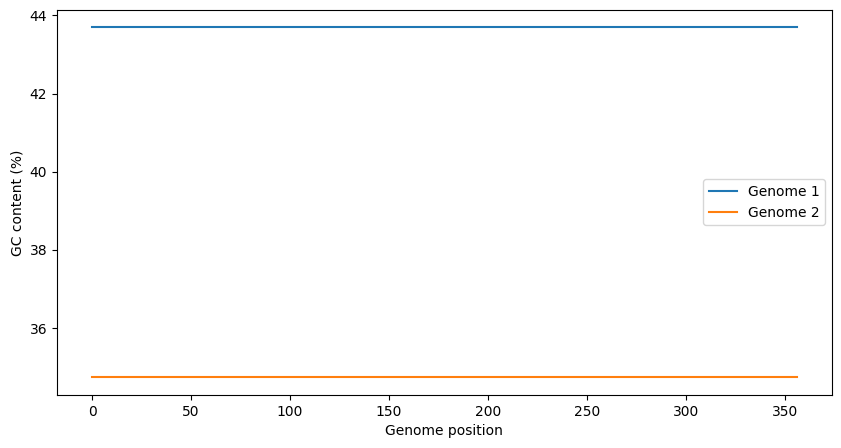

In [138]:
compare_genomes('seq.fasta', 'seq2.fasta')